## 텍스트
- 텍스트 정규화


### 클렌징 (Cleansing)
- 텍스트 분석에 방해되는 불필요한 문자, 기호를 사전에 제거하는 작업.

### 토근화 (Tokenization)
- 문장 토큰화 :
- 단어 토큰화 :

### 스톱 워드 제거
- 

## 텍스트 데이터 분석 (자연어처리) 사전작업
- 불필요한 단어들 제거
- 문장을 단어별로 쪼개기
- 단어를 숫자로 변환하기

In [5]:
# 구글 드라이브 연동하기
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/human/nlp-getting-started/train.csv')
train

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


## 머신러닝의 종류
- 수치를 예측 : 키가 200이면 몸무게는 몇일까?
- 범주를 예측 : 키가 200이면 남자일까? 여자일까?
- target이 0이면 가짜뉴스, 1이면 진짜뉴스

In [6]:
# 시각화 코드 작성
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

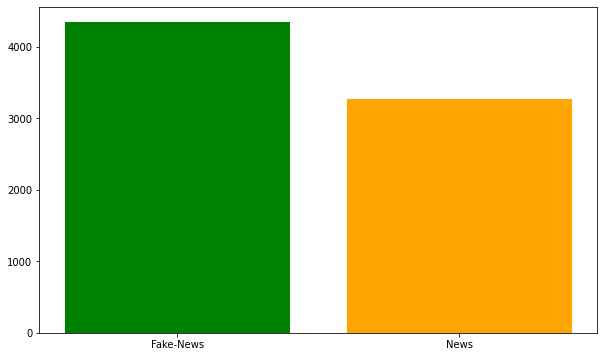

In [7]:
import matplotlib.pyplot as plt

result = train['target'].value_counts()
labels = ['Fake-News', 'News']

fig, ax = plt.subplots(figsize = (10,6))
ax.bar(labels, result, color = ['green', 'orange'])
plt.show()

## 데이터 분리
- target이 0일 때, 데이터 분리
- target이 1일 때, 데이터 분리


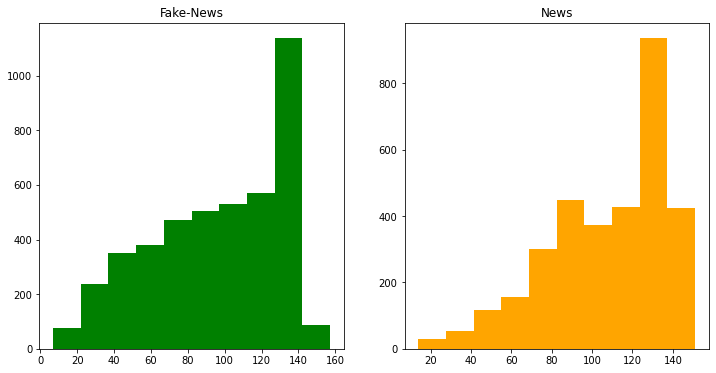

In [14]:
# 행추출
# target_0 = train[train['target'] == 0]['text']
# print(target_0)

# 추출한 행을 글자길이로 변경
target_0 = train[train['target'] == 0]['text'].str.len() # 행추출
# print(target_0)

target_1 = train[train['target'] == 1]['text'].str.len()

fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].hist(target_0, color = 'green')
ax[0].set_title('Fake-News')

ax[1].hist(target_1, color = 'orange')
ax[1].set_title('News')

plt.show()

## 그룹간의 분포 비교 해주는 그래피 : 박스플롯


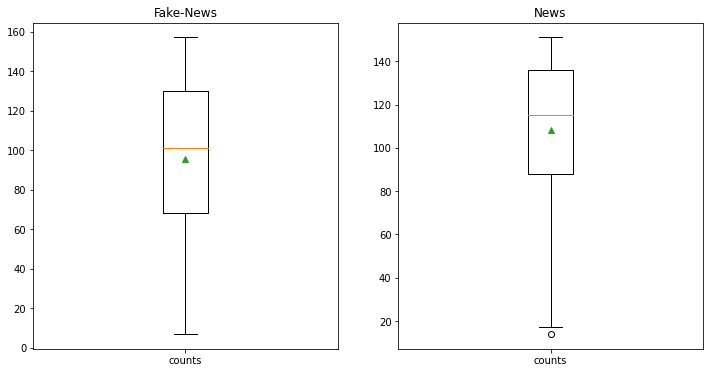

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

# Fake News
ax[0].boxplot(target_0, labels = ['counts'], showmeans = True)
ax[0].set_title('Fake-News')

ax[1].boxplot(target_1, labels = ['counts'], showmeans = True)
ax[1].set_title('News')

plt.show()

## 워드 클라우드
- 워드 크랄우드 : 빈도분석 (글자가 얼마나 자주 나오냐)


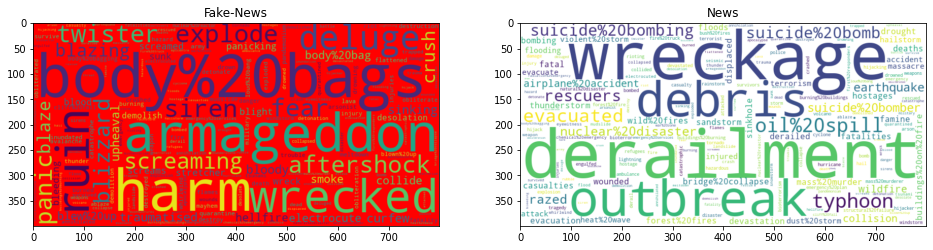

In [19]:
from wordcloud import WordCloud, STOPWORDS

fake_news_keywords = dict(train[train['target'] == 0]['keyword'].value_counts())
news_keywords = dict(train[train['target'] == 1]['keyword'].value_counts())

# fake_news_keywords
stopwords = set(STOPWORDS)
fake_news_wc = WordCloud(stopwords = stopwords, width = 800,
                         height = 400,
                         background_color = 'red').generate_from_frequencies(fake_news_keywords)



stopwords = set(STOPWORDS)
news_wc = WordCloud(stopwords = stopwords, width = 800,
                    height = 400,
                    background_color = 'white').generate_from_frequencies(news_keywords)


fig, ax = plt.subplots(1, 2, figsize = (16, 10))
ax[0].imshow(fake_news_wc, interpolation = 'bilinear')
ax[0].set_title('Fake-News')

ax[1].imshow(news_wc, interpolation = 'bilinear')
ax[1].set_title('News')

plt.show()